## Part 1

1. What is a new type of visualization you learned about on one of the two gallery pages (or, if you are already familiar with all of the visuals, what is the most interesting one to you)?

https://altair-viz.github.io/gallery/layer_line_color_rule.html
"Line Chart with Layered Aggregates" is the one I first learn about, it is a multi-series line chart of the daily closing stock prices along with a layered rule showing the average values. I think it will be useful for visualization of the stock price predication project of another DS course.

2. Pick one plot type presented on  https://www.python-graph-gallery.com/Links to an external site. that we have not covered already during our in-class Python tutorials and implement it into a Python notebook.  As part of your notebook, include a text box that explains why you chose this visual encoding (i.e., why is it interesting to you).

In [1]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

alt.RepeatChart(...)

I am interested in this repeated choropleth map because I can integrated into my previous Python project about data scientists salary. I can easily show regional distribution and compare the salary from differenct perspectives such as working hours, number of required skills etc without draw a graph three times.

## Part 2

1. Which is your favorite example in the gallery, and why?  Provide a link to your favorite with a screenshot, and a couple sentences stating why it is your favorite.

https://altair-viz.github.io/gallery/bar_chart_with_negatives.html

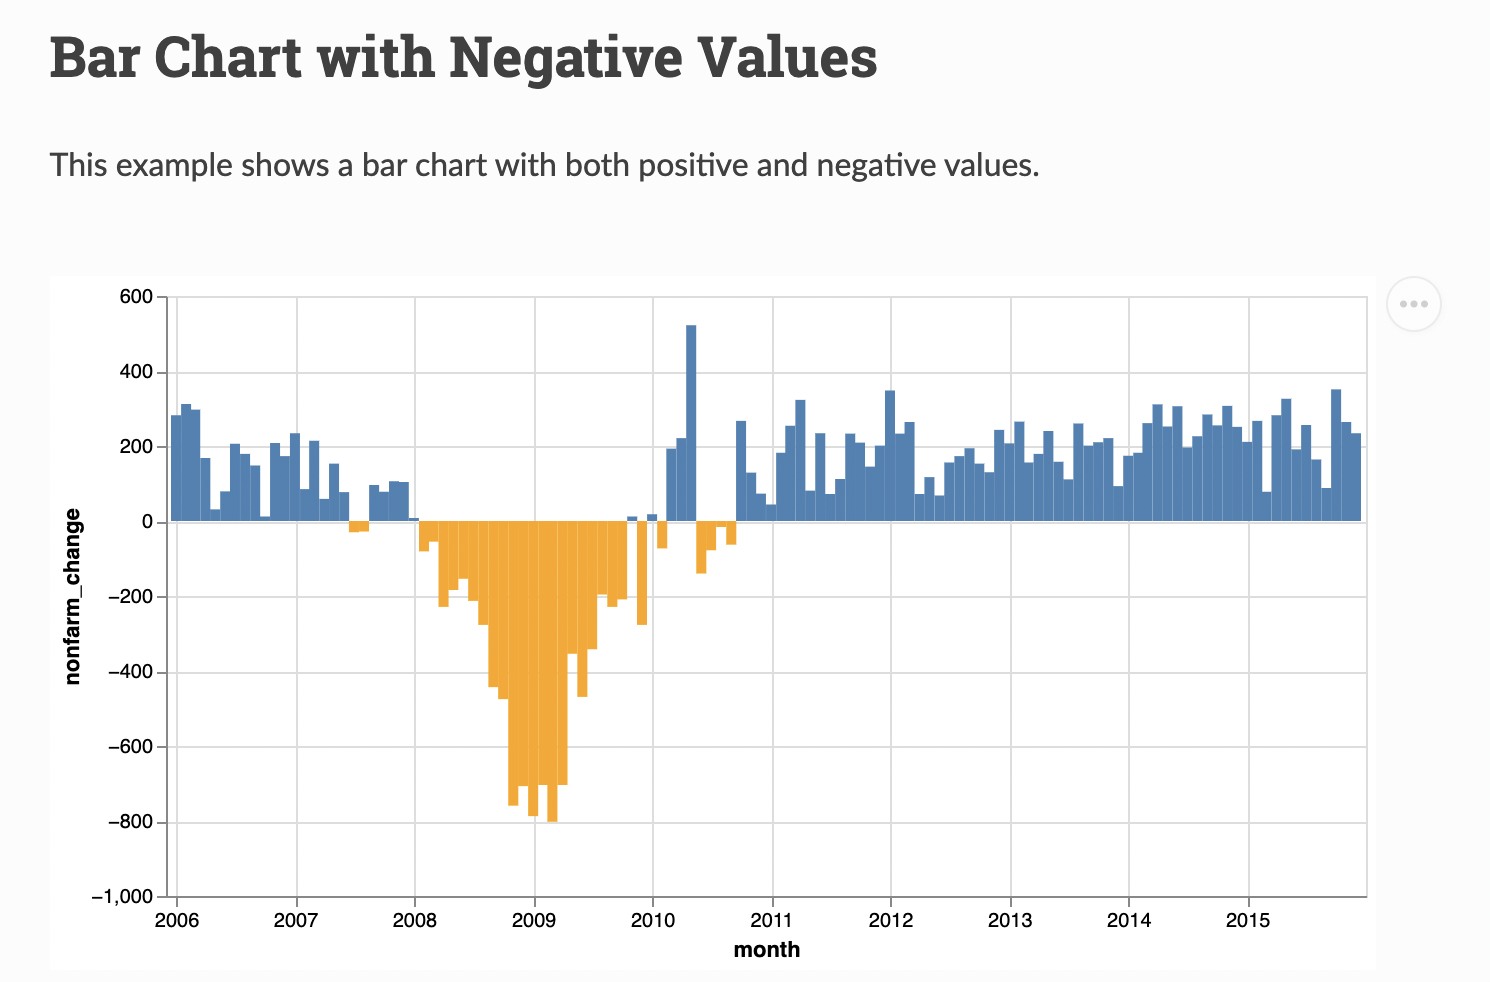

This chart provides a clear way to visualize a dataset that contains negative values, change of color is nessacary to distinguish negative and positive value. It can be challenging to represent in some types of graphs. The use of a horizontal bar chart, rather than a traditional vertical bar chart, can also make the data more accessible to readers who have difficulty interpreting charts with vertical axes.

2. Although the “Case Studies” are really interesting, the code is poorly commented thus at times challenging to understand the functionality of the code.  Pick one of the following case studies, copy-and-paste the code, and add comments to explain how the code is generating the visualization

In [2]:
# Importing necessary libraries
import altair as alt
from vega_datasets import data

# Loading airport and state data
airports = data.airports()
states = alt.topo_feature(data.us_10m.url, feature='states')

# draw US states background wither given size, projected using the Albers USA projection
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# Airport positions on background, 
# longitude and latitude data for each airport is used to position the circles on the chart
# tooltip is added to display the information of each airport when the user hovers over the circle
points = alt.Chart(airports).mark_circle(
    size=10,
    color='steelblue'
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    tooltip=['name', 'city', 'state']
)

# Combining background and points
background + points

alt.LayerChart(...)

## Part 3

summary: The article discusses an ecosystem valuation approach used to evaluate the Boston Harbor cleanup project, which was aimed at reducing pollution and improving water quality. The Boston harbor was nasty until EPA and other agencies involved taking actions. By investigating different waterfront areas, the study used a range of economic and ecological indicators to assess the benefits of the cleanup project, including changes in recreational opportunities, improved water quality, and increased fish and wildlife populations. The article highlights the importance of considering both economic and ecological benefits when evaluating environmental cleanup projects, as well as the challenges of accurately valuing ecosystem services. The study found that the benefits of the Boston Harbor cleanup project significantly outweighed the costs, providing an example of the potential economic and ecological benefits of environmental restoration projects.

In [3]:
import pandas as pd
import altair as alt

In [4]:
# load xlsx data frame
land_cover_bos = pd.read_excel('table5.xlsx')
cover_water = pd.read_excel('table3.xlsx')
annual_value = pd.read_excel('table6.xlsx')

In [5]:
# draw the first chart of land cover areas in Boston
chart_1 = alt.Chart(land_cover_bos).mark_bar().encode(
    x='Land cover types',
    y='Value',
    color='Land cover types',
    column='Level')

chart_1 = chart_1.properties(
    title='Land Cover Areas in Boston by different levels'
)

chart_1

alt.Chart(...)

We can summarize that the high level land in Boston has significant higher value than low level land. And for both low and high level land, "forest" land is the most valuable within 14 types of land cover. So it is more efficient to invest clean up on higher level land and forest coved land. 

In [6]:
# draw the second chart of land cove areas by watershed
chart_2 = alt.Chart(cover_water).mark_bar().encode(
    x='Land cover types',
    y='Area',
    color='Land cover types',
    column='Location')

chart_2 = chart_2.properties(
    title='Land Cover Areas at MHHW by watershed'
)

chart_2

alt.Chart(...)

There are four diffenrent locations by watershed, "islands" has the smallest area, and "coastal waters" take up the majority of the water area of island in Boston. On the other side, "Charles and neponset" has the largest area, and "forest" is the largest here. These is no significant differences of area within each land cover types for other two locations.

In [7]:
# draw the third chart of annual value of ecosystem services
chart_3 = alt.Chart(annual_value).mark_bar().encode(
    x='Cleanup status',
    y='Value',
    color='Cleanup status',
    column='Level')

chart_3 = chart_3.properties(
    title='Annual Value of Ecosystem Services by Cleanup Status'
)

chart_3

alt.Chart(...)

The annual value of ecosystem services increase as the level of land increase, high level land has the highest total annual value, and low level land has the lowest total annual value. For each level of land, they shared the similar pattern of cleanup status and annual value, "with cleanup" has the highest value, followed by " without cleanup", and 'benefit of cleanup" has the lowest value in different levels of land.